##**1. Access Datasets from Google Colab**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score

In [ ]:
# load TRAIN datasets
train_connectome = pd.read_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
train_categorical = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx')
train_solutions = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAINING_SOLUTIONS.xlsx')
train_quantitative = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx')

# load TEST datasets
test_quantitative = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_QUANTITATIVE_METADATA.xlsx')
test_connectome = pd.read_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
test_categorical = pd.read_excel('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_CATEGORICAL.xlsx')


### Explore the data
# display a preview of train datasets
print("Display first 5 rows of TRAIN datasets")
train_quantitative.head()
train_connectome.head()
train_categorical.head()
train_solutions.head()


# info of datasets
print("Exploring info of TRAIN datasets")
train_quantitative.info()
train_connectome.info()
train_categorical.info()
train_solutions.info()

# describe the TRAIN datasets
print("Describe TRAIN datasets")
train_quantitative.describe()
train_connectome.describe()
train_categorical.describe()
train_solutions.describe()


# display a preview of test datasets
test_quantitative.head()
test_connectome.head()
test_categorical.head()


# describe the TRAIN datasets
print("Describe TEST datasets")
test_quantitative.describe()
test_connectome.describe()
test_categorical.describe()

Display first 5 rows of TRAIN datasets
Exploring info of TRAIN datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externaliz

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
mean,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000
max,2023.000000,5.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


##**2. Data cleaning**


### 1. train_quantitative and test_quantitative dataset

Check if any values are missing in the dataset






In [ ]:
train_quantitative_missing_val = train_quantitative.isna().sum()
train_quantitative_missing_percentage = train_quantitative_missing_val / len(train_quantitative) * 100
print({"Missing values for train quantitative is \n": train_quantitative_missing_percentage})

{'Missing values for train quantitative is \n': participant_id                 0.000000
EHQ_EHQ_Total                  0.000000
ColorVision_CV_Score           0.000000
APQ_P_APQ_P_CP                 0.000000
APQ_P_APQ_P_ID                 0.000000
APQ_P_APQ_P_INV                0.000000
APQ_P_APQ_P_OPD                0.000000
APQ_P_APQ_P_PM                 0.000000
APQ_P_APQ_P_PP                 0.000000
SDQ_SDQ_Conduct_Problems       0.000000
SDQ_SDQ_Difficulties_Total     0.000000
SDQ_SDQ_Emotional_Problems     0.000000
SDQ_SDQ_Externalizing          0.000000
SDQ_SDQ_Generating_Impact      0.000000
SDQ_SDQ_Hyperactivity          0.000000
SDQ_SDQ_Internalizing          0.000000
SDQ_SDQ_Peer_Problems          0.000000
SDQ_SDQ_Prosocial              0.000000
MRI_Track_Age_at_Scan         29.678483
dtype: float64}


Check the distribution of values before processing (for MRI_Track_Age_at_Scan)




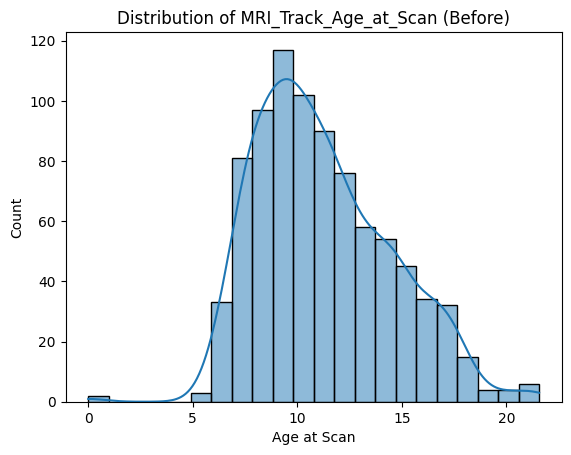

In [ ]:
sns.histplot(train_quantitative['MRI_Track_Age_at_Scan'], kde=True)
plt.title("Distribution of MRI_Track_Age_at_Scan (Before)")
plt.xlabel("Age at Scan")
plt.show()

Using KNN to impute the data for this particular column, since using average will create a spike, which will impact the score of the model.


Missing values after KNN imputation:
0


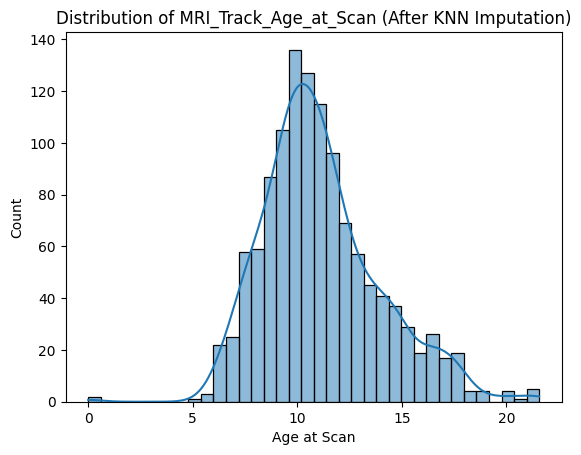

In [ ]:
# Select only numerical features for KNN imputation, exclude Participant_id
numeric_features = train_quantitative.select_dtypes(include=['float64', 'int64'])

# Initialize and apply KNN imputer
imputer = KNNImputer(n_neighbors=11)
imputed_data = imputer.fit_transform(numeric_features)

# Convert the imputed data back to a DataFrame
train_quantitative_imputed = pd.DataFrame(imputed_data, columns=numeric_features.columns)

# Update the original DataFrame with the imputed values
train_quantitative['MRI_Track_Age_at_Scan'] = train_quantitative_imputed['MRI_Track_Age_at_Scan']


# Verify that all missing values have been filled
print("Missing values after KNN imputation:")
print(train_quantitative['MRI_Track_Age_at_Scan'].isna().sum())

# Plot the new distribution
sns.histplot(train_quantitative['MRI_Track_Age_at_Scan'], kde=True)
plt.title("Distribution of MRI_Track_Age_at_Scan (After KNN Imputation)")
plt.xlabel("Age at Scan")
plt.show()

In [ ]:
# test quantitative explore missing data
test_quantitative_missing_val = test_quantitative.isna().sum()
print({"Missing values for test quantitative is \n": test_quantitative_missing_val})

{'Missing values for test quantitative is \n': participant_id                 0
EHQ_EHQ_Total                  1
ColorVision_CV_Score           9
APQ_P_APQ_P_CP                15
APQ_P_APQ_P_ID                15
APQ_P_APQ_P_INV               15
APQ_P_APQ_P_OPD               15
APQ_P_APQ_P_PM                15
APQ_P_APQ_P_PP                15
SDQ_SDQ_Conduct_Problems      30
SDQ_SDQ_Difficulties_Total    30
SDQ_SDQ_Emotional_Problems    30
SDQ_SDQ_Externalizing         30
SDQ_SDQ_Generating_Impact     30
SDQ_SDQ_Hyperactivity         30
SDQ_SDQ_Internalizing         30
SDQ_SDQ_Peer_Problems         30
SDQ_SDQ_Prosocial             30
MRI_Track_Age_at_Scan          0
dtype: int64}


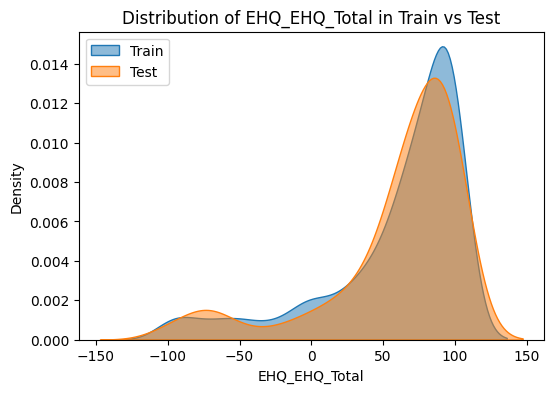

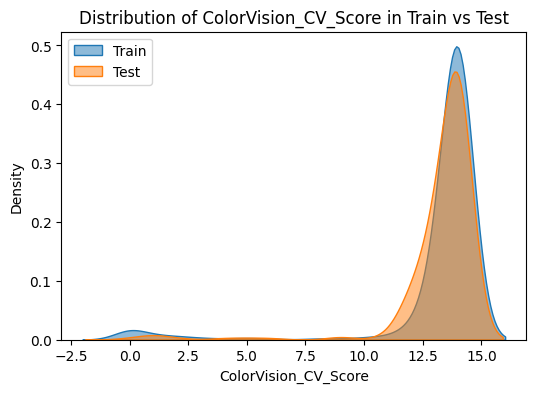

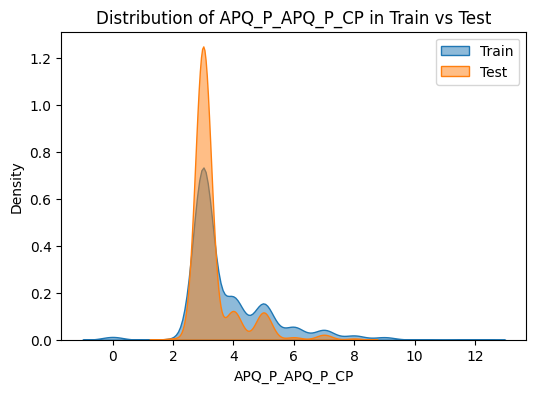

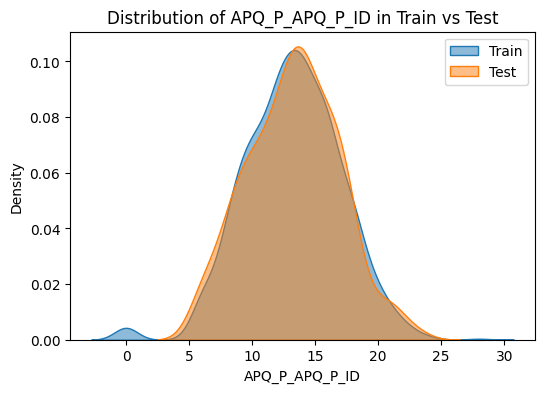

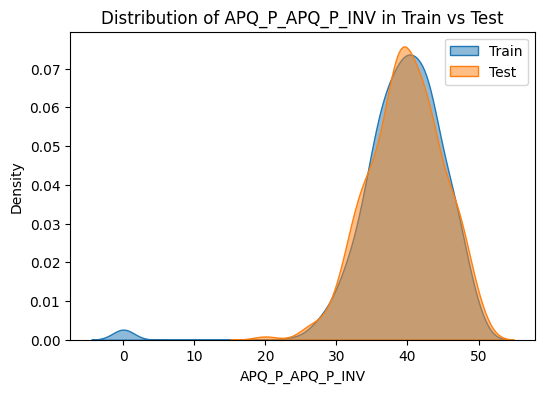

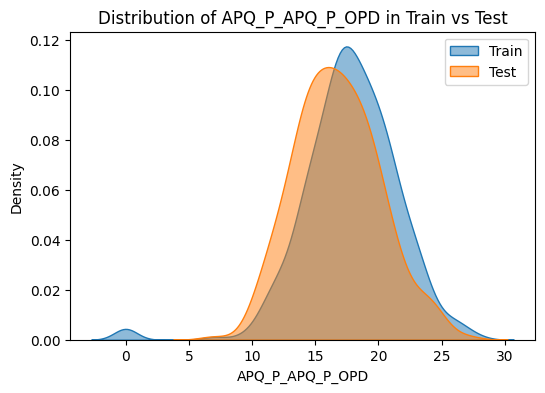

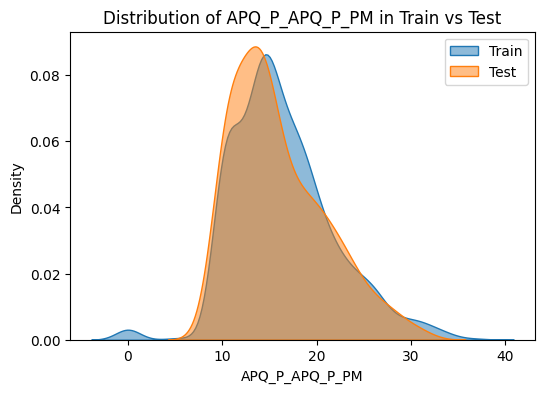

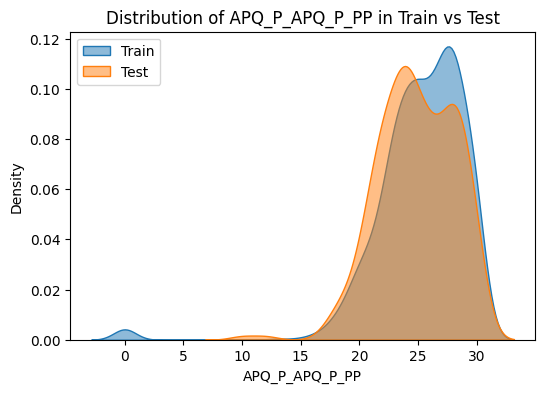

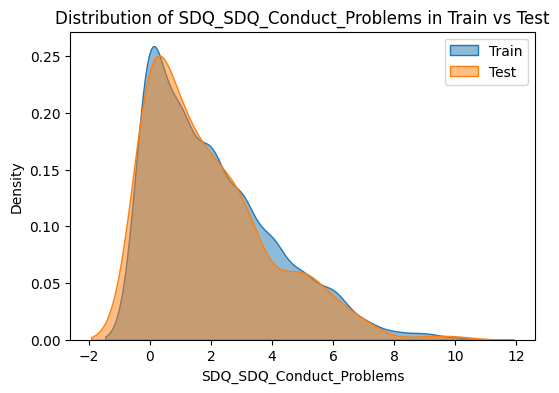

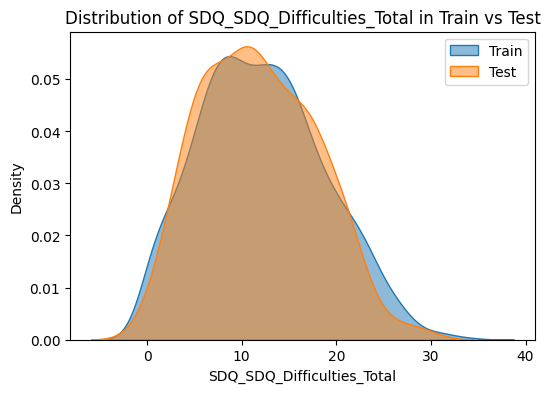

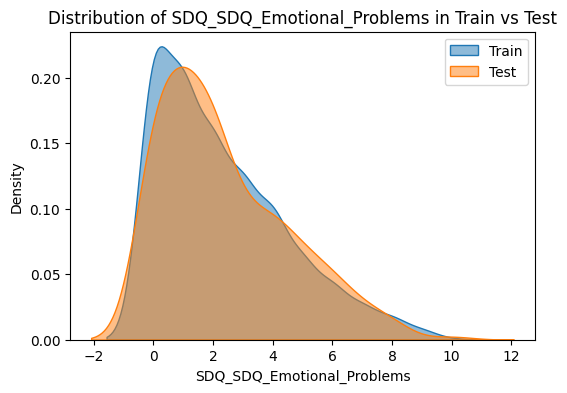

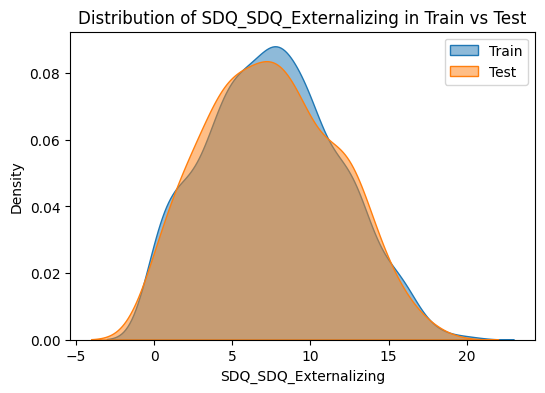

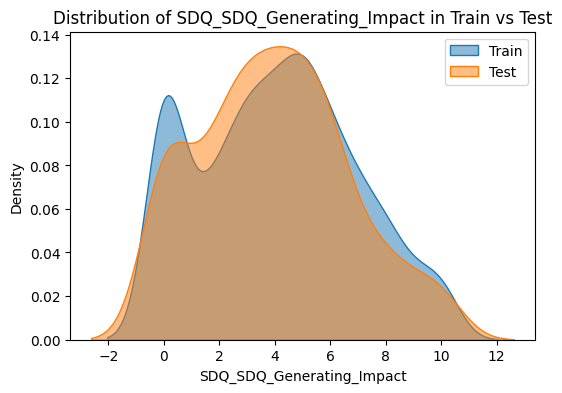

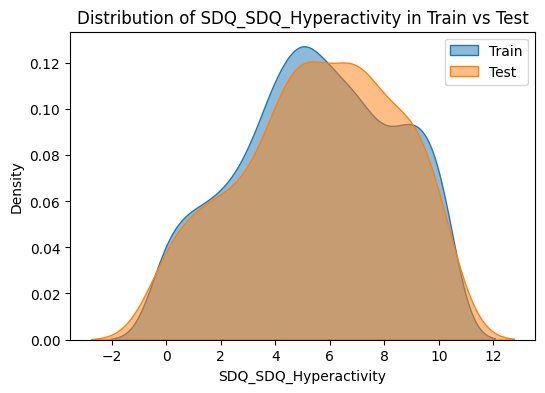

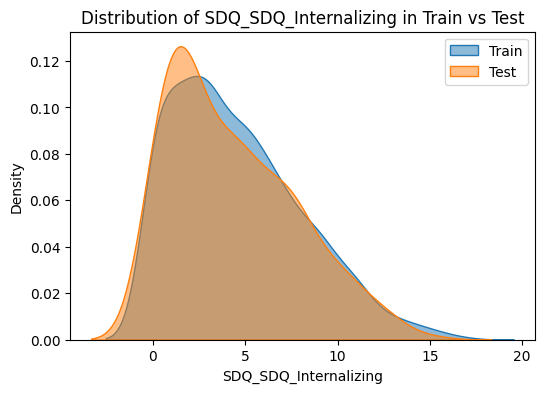

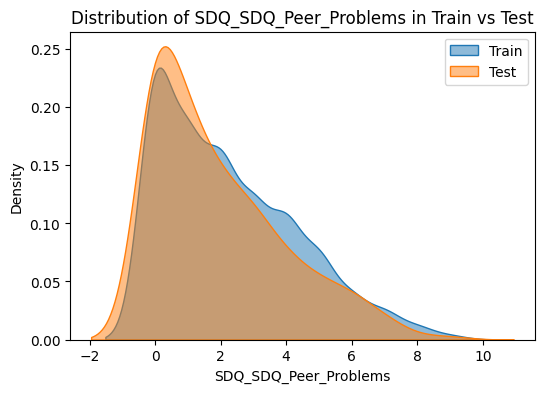

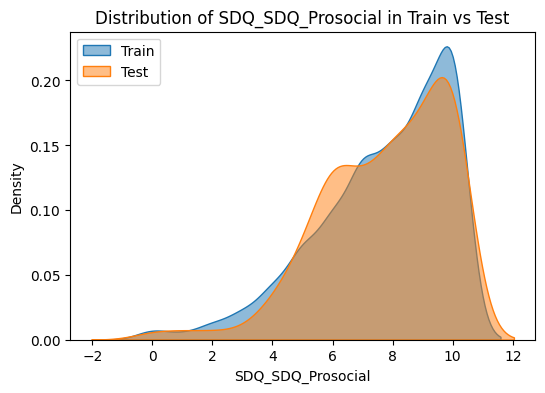

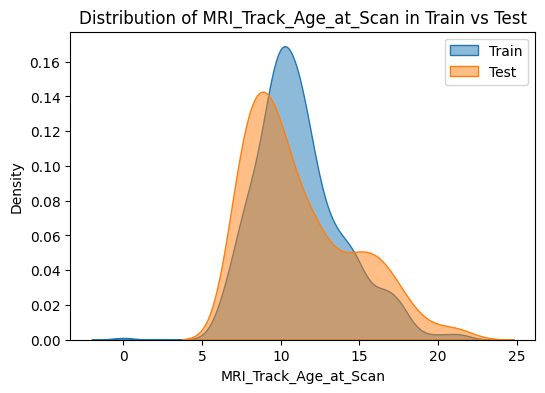

In [ ]:
num_columns = test_quantitative.select_dtypes(include=['float64', 'int64'])

# Plot distributions for comparison
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(train_quantitative[col], label="Train", fill=True, alpha=0.5)
    sns.kdeplot(test_quantitative[col], label="Test", fill=True, alpha=0.5)
    plt.title(f"Distribution of {col} in Train vs Test")
    plt.legend()
    plt.show()

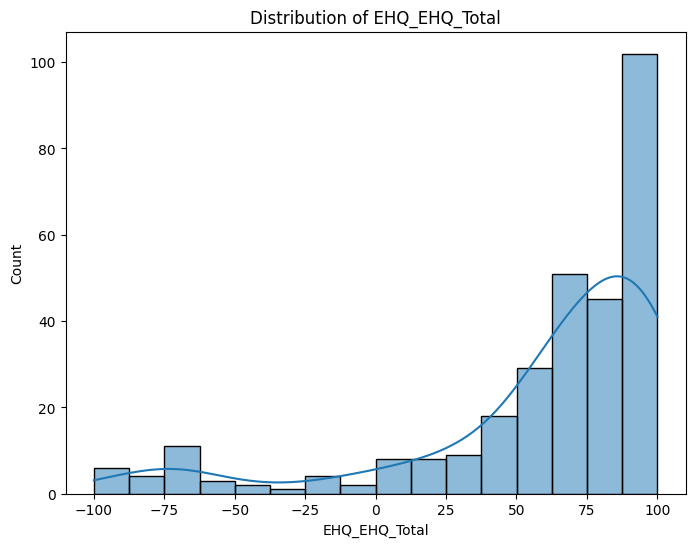

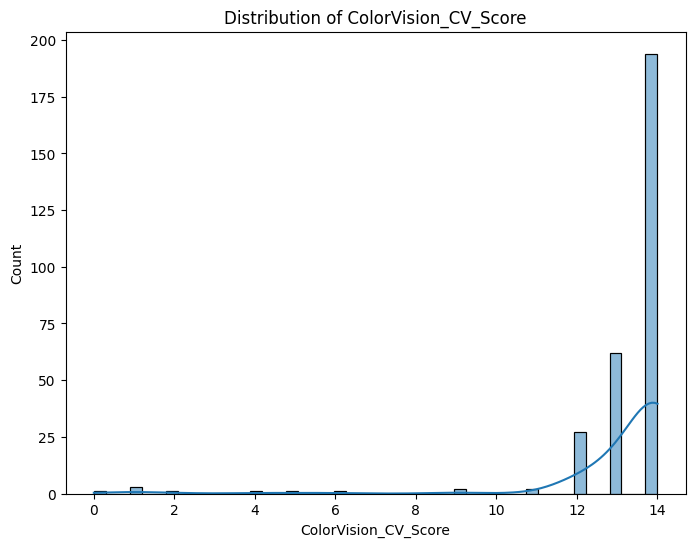

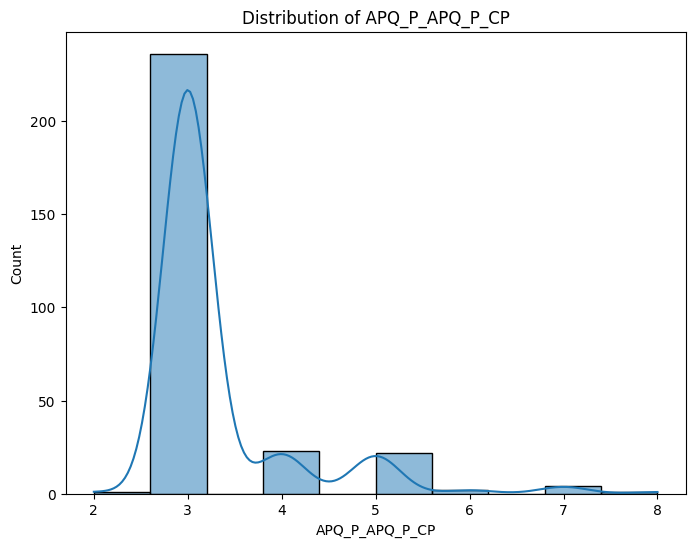

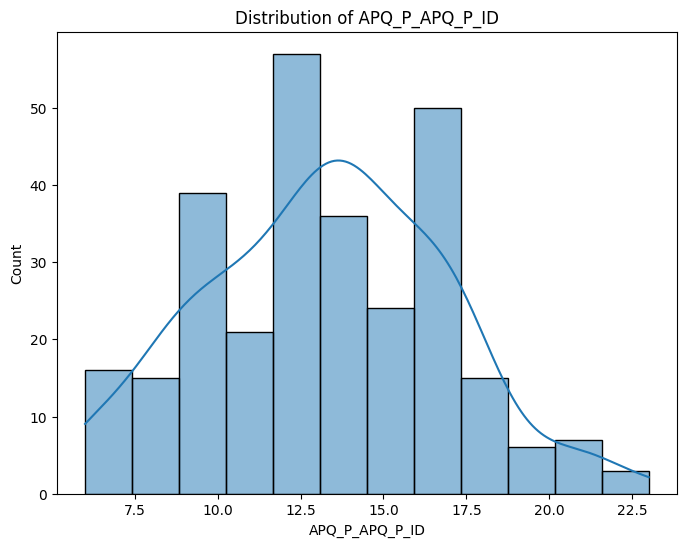

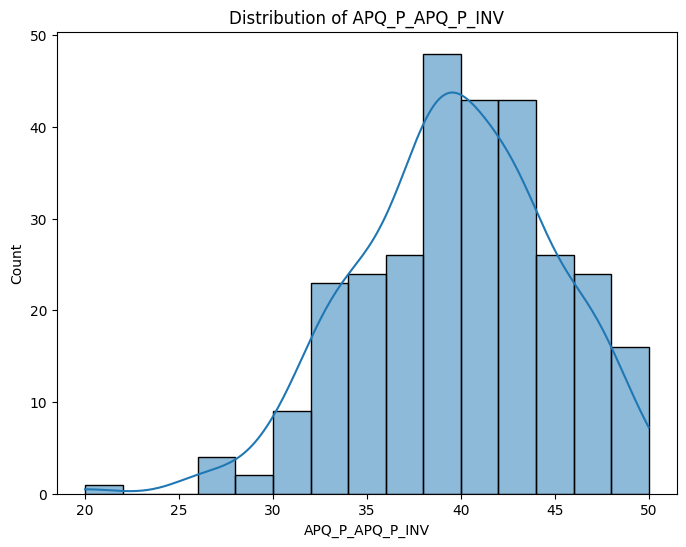

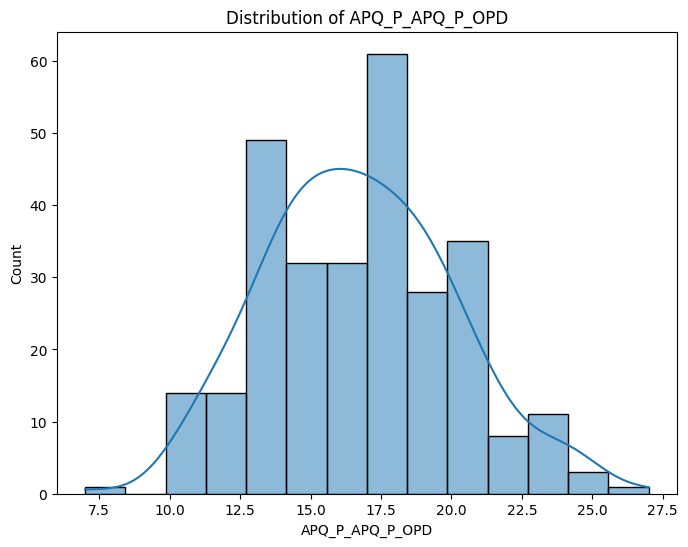

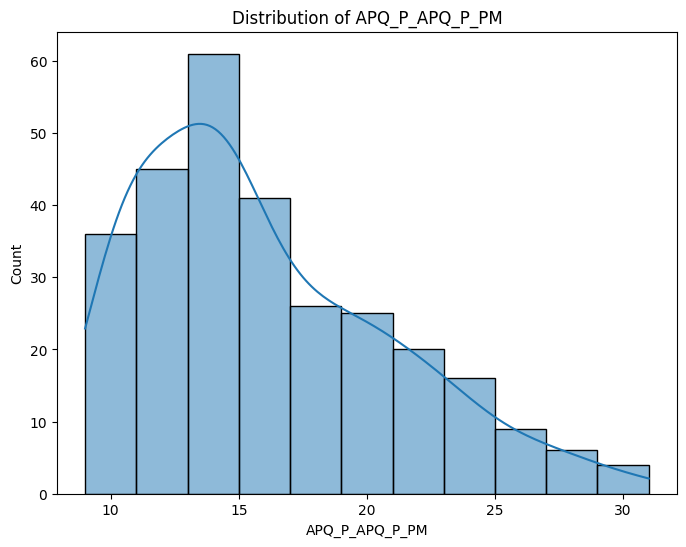

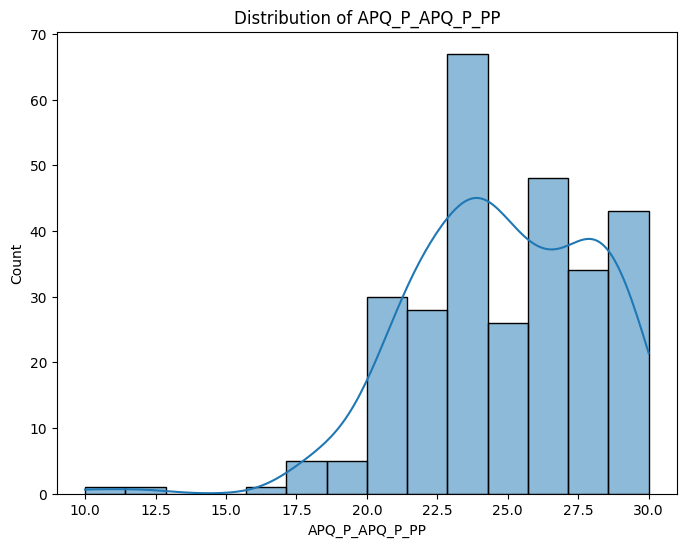

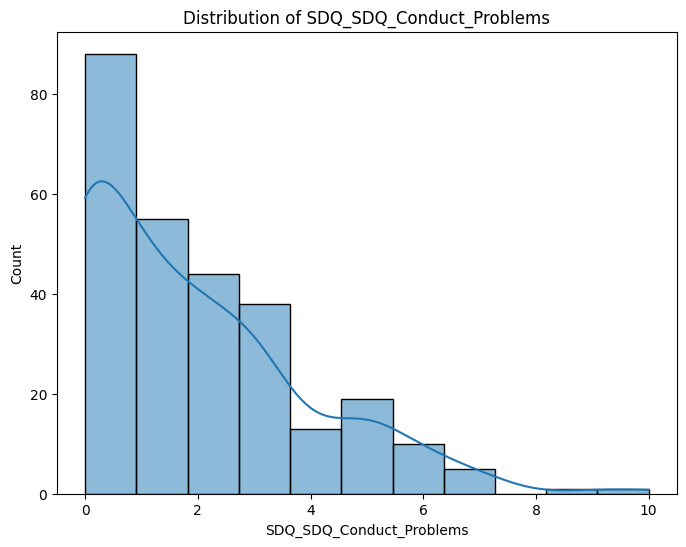

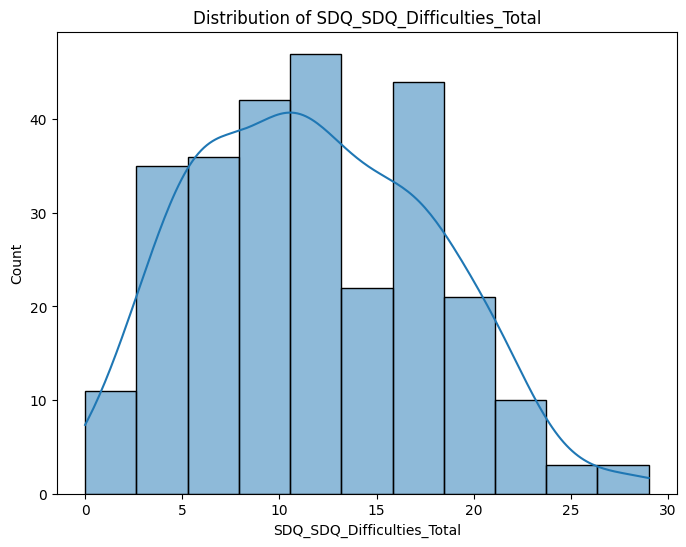

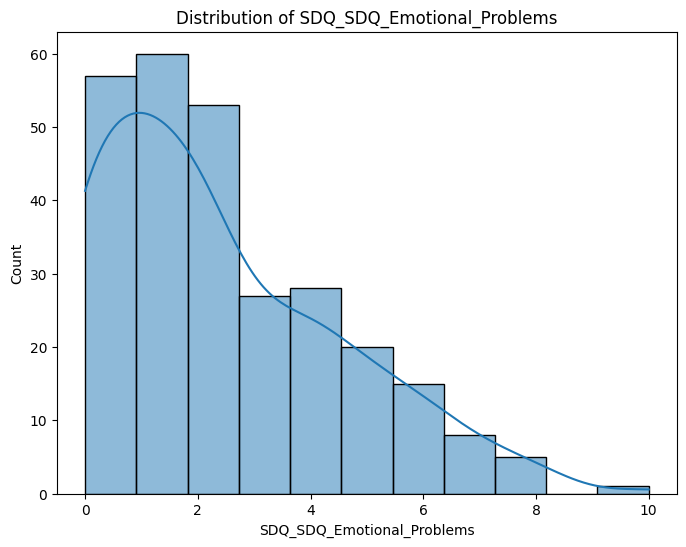

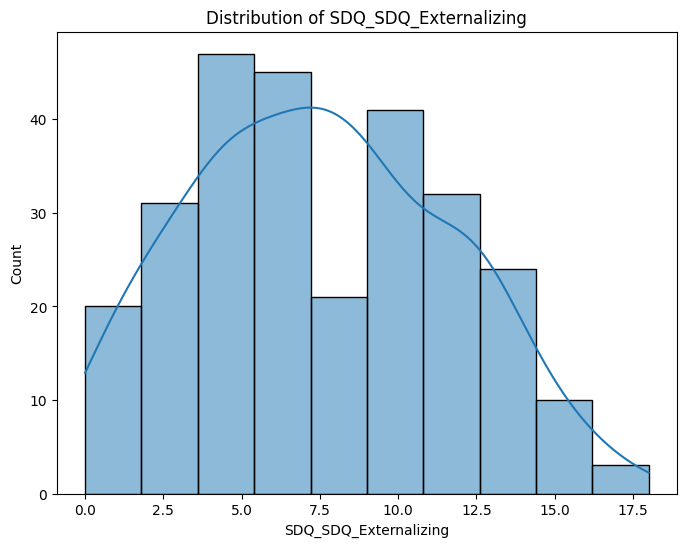

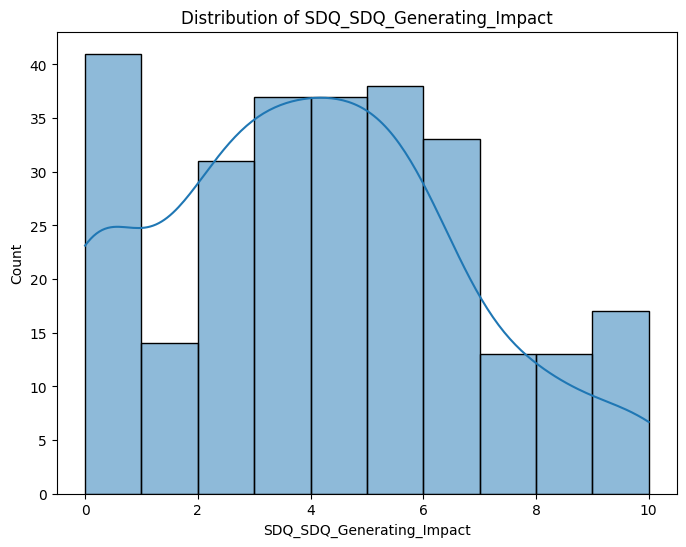

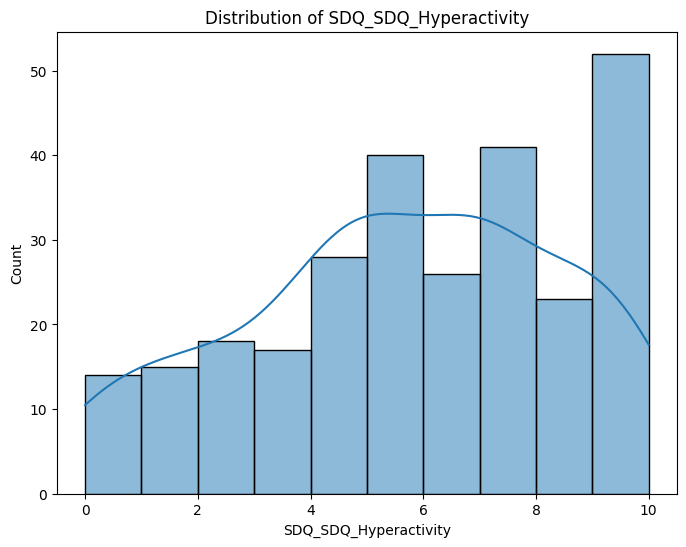

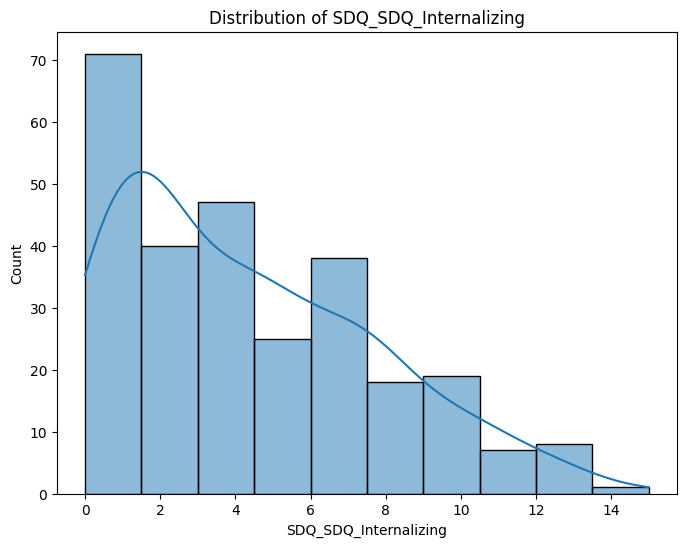

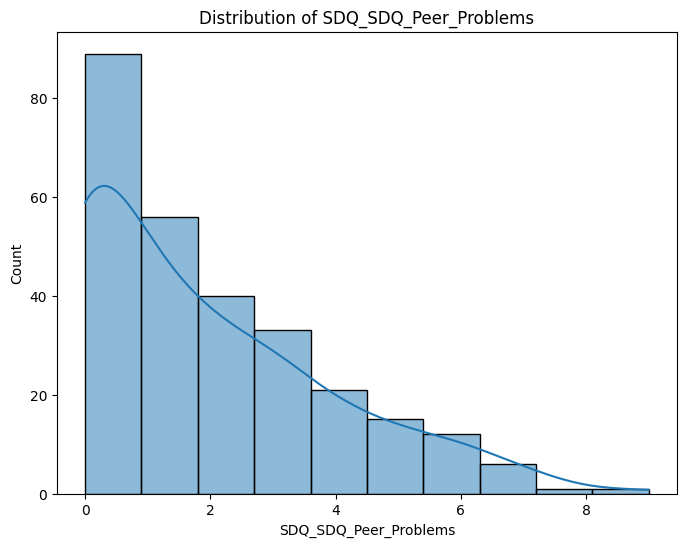

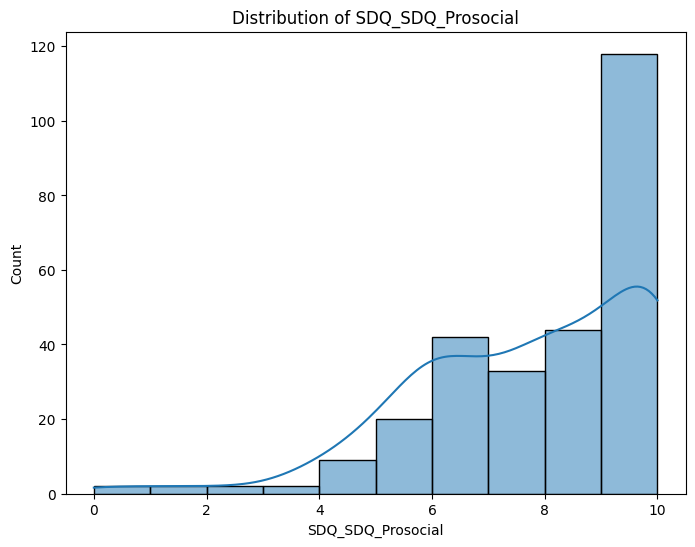

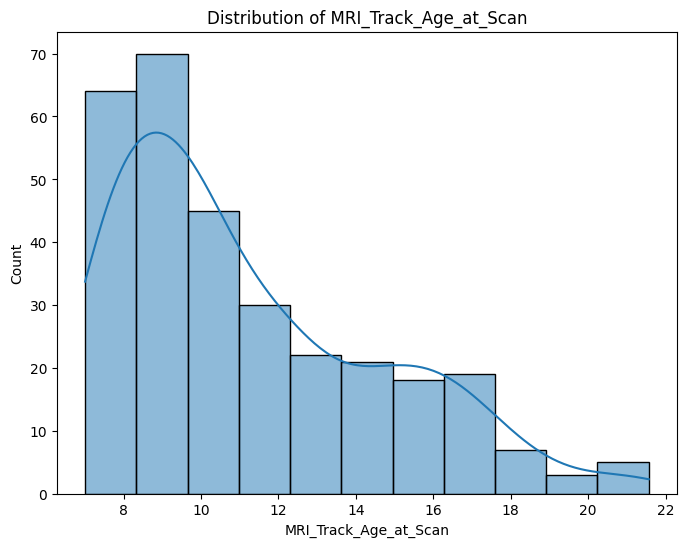

In [ ]:
# checking the distribution of each missing values columns before applying KNN
# imputation
for col in num_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(test_quantitative[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.show()

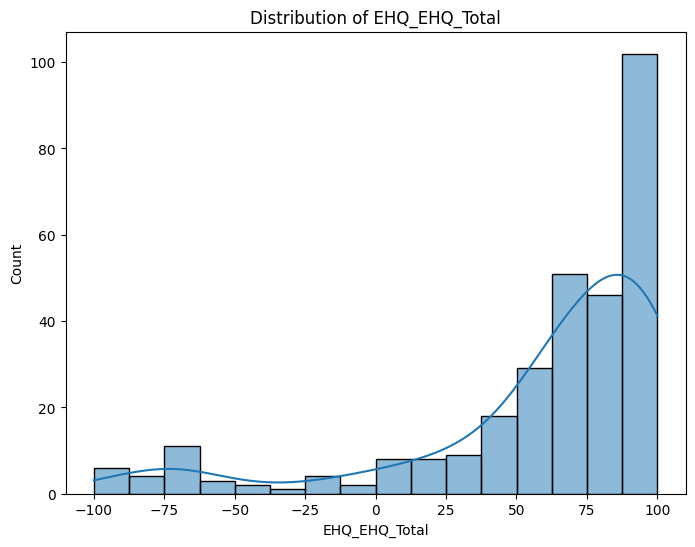

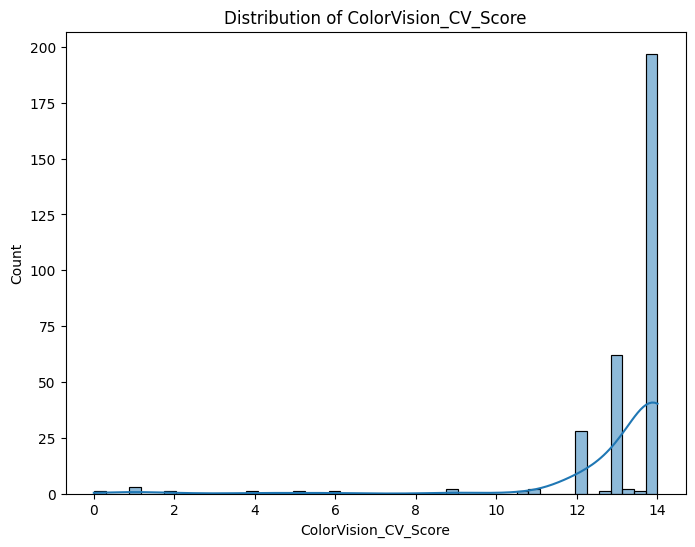

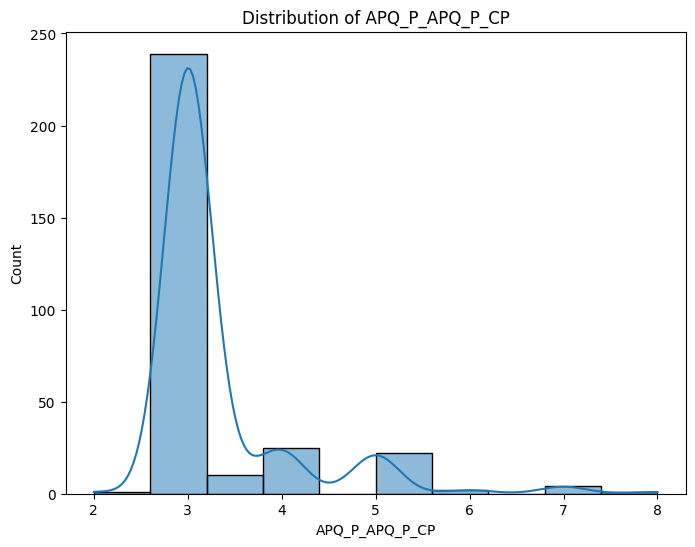

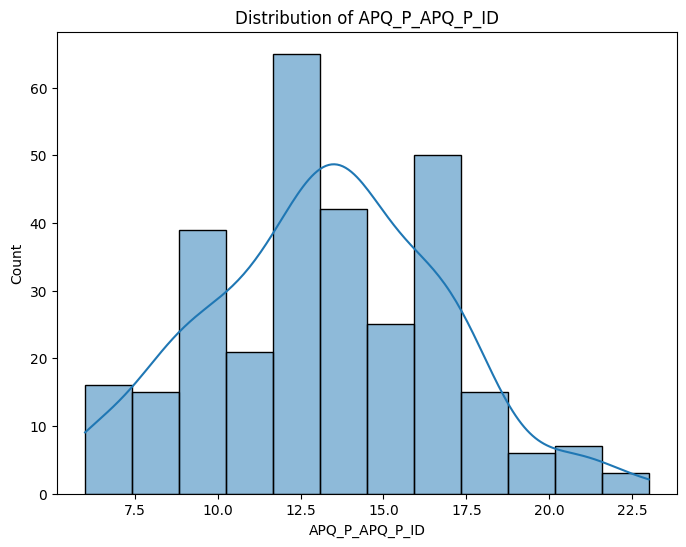

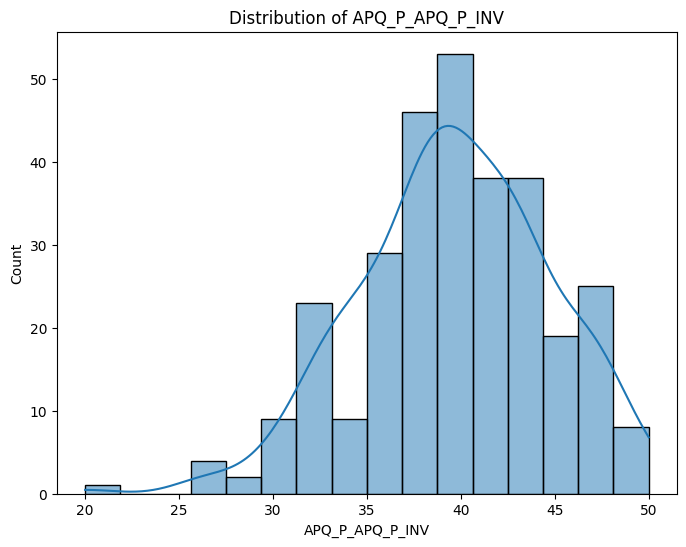

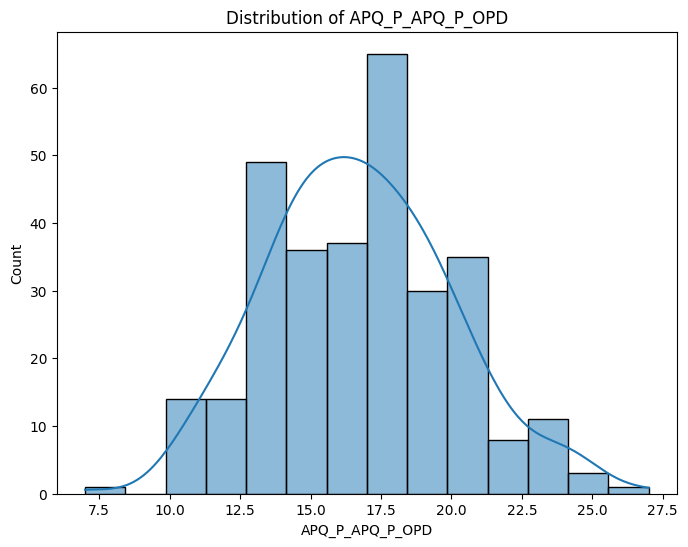

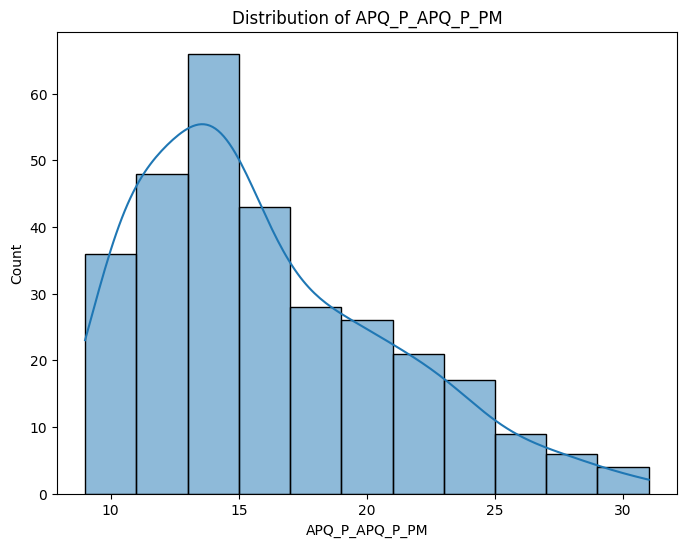

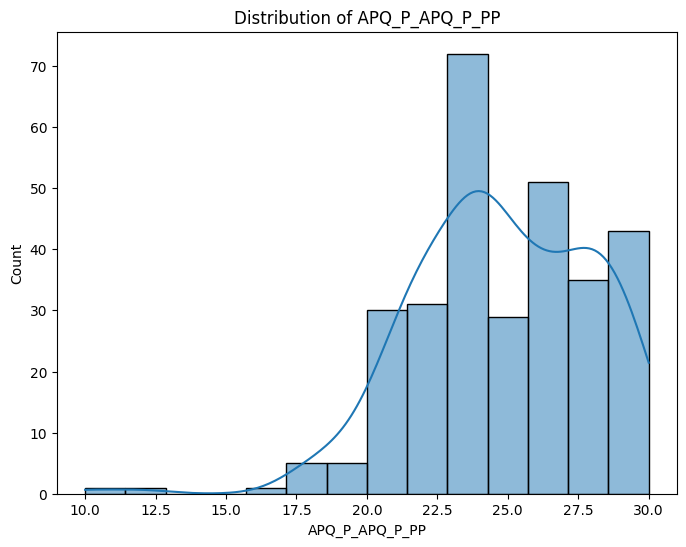

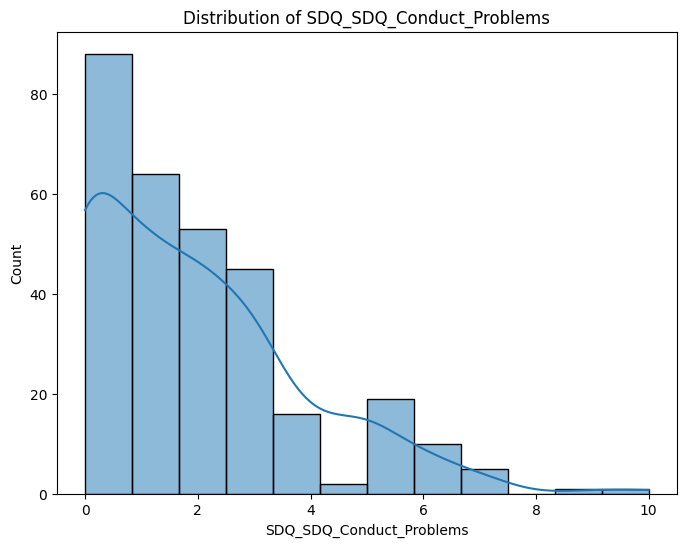

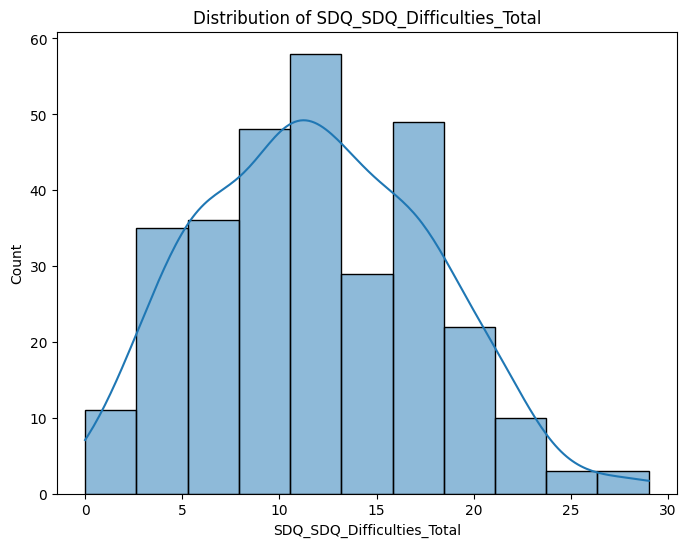

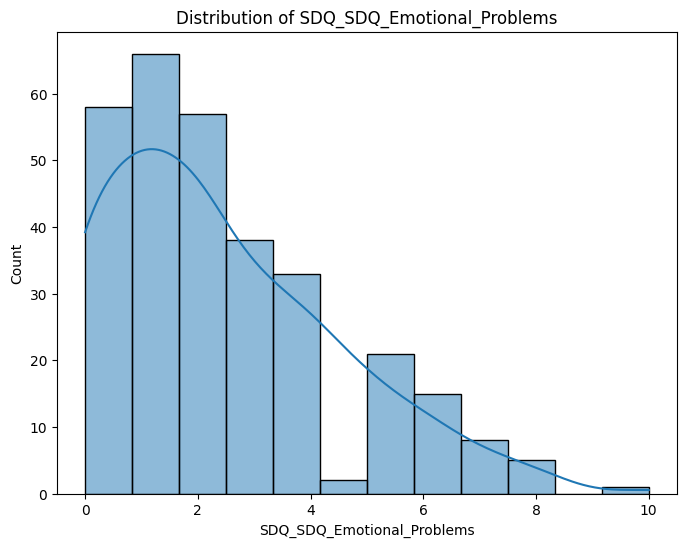

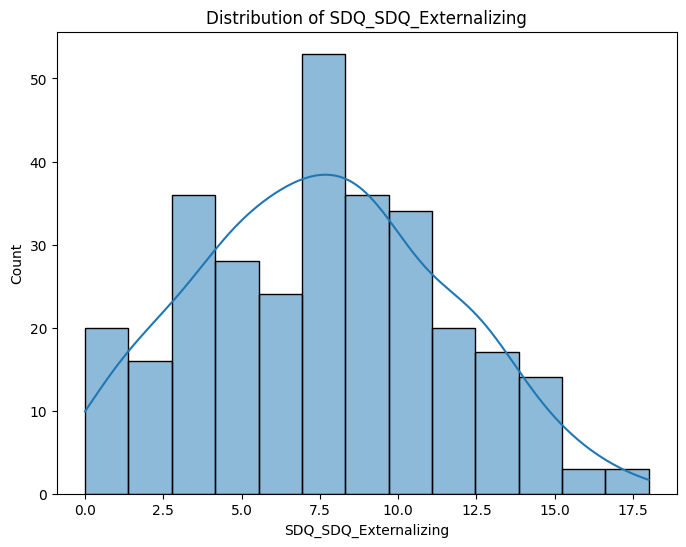

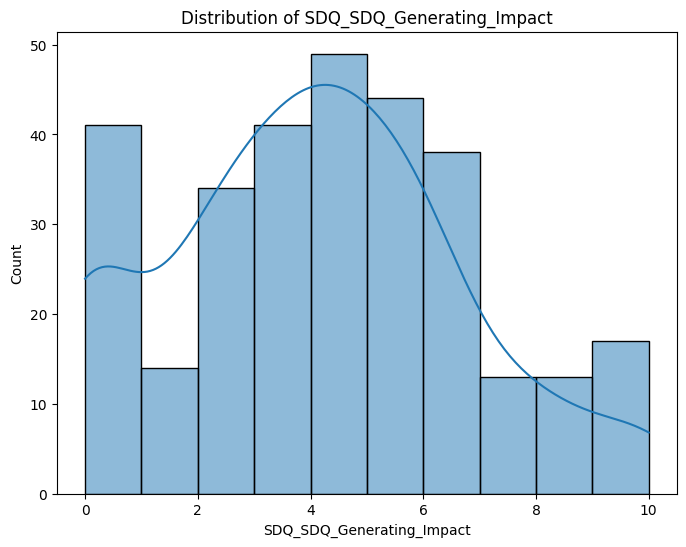

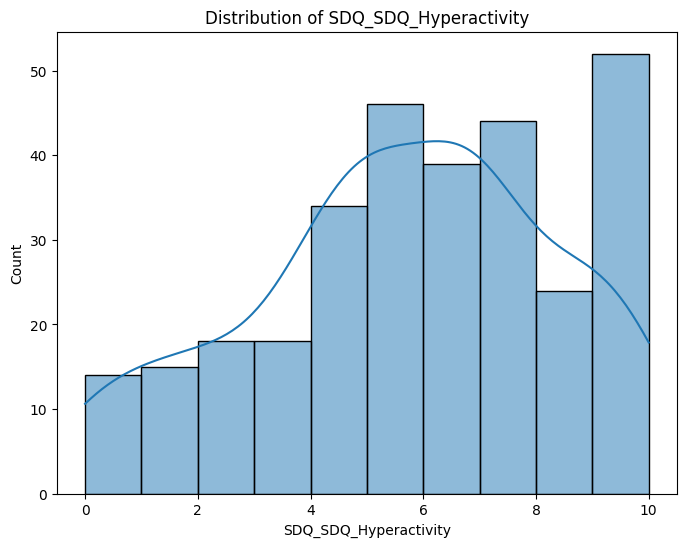

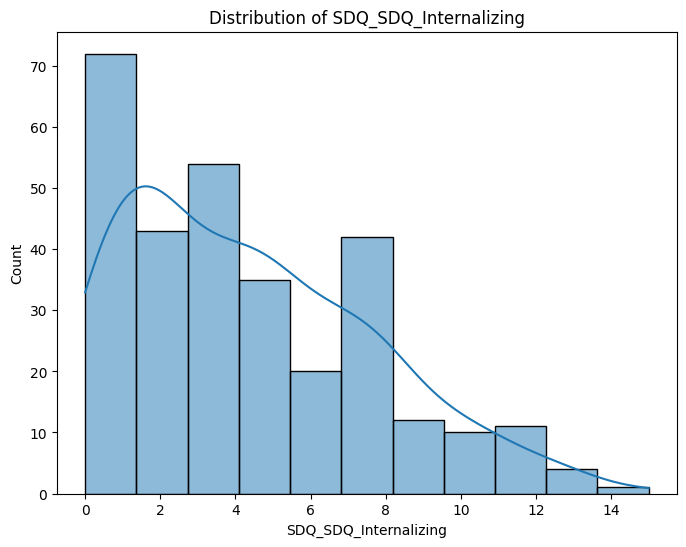

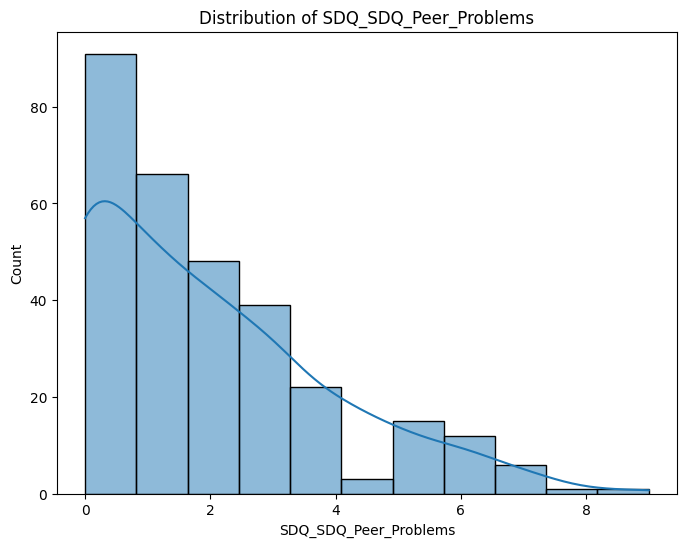

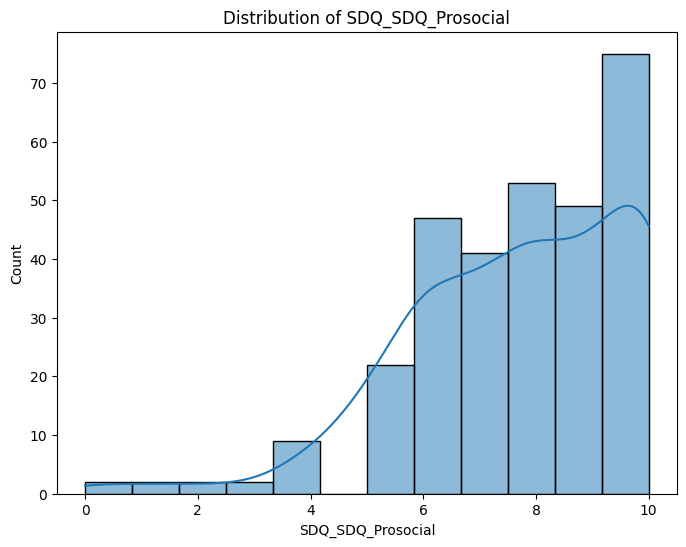

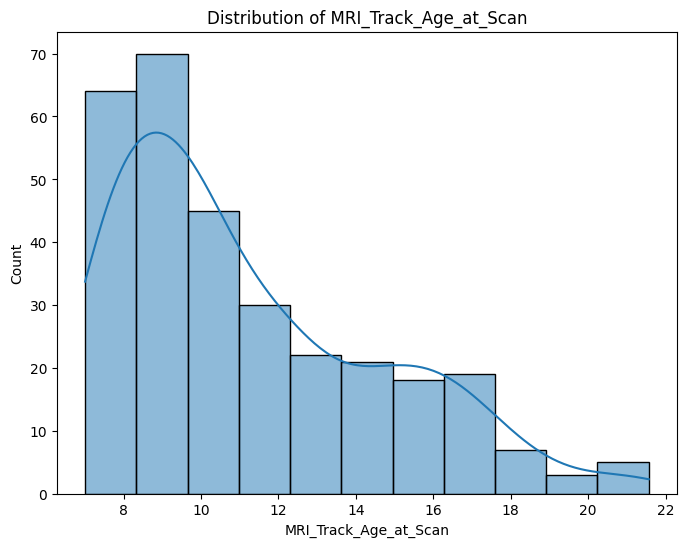

In [ ]:
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation (excluding participant_id)
test_quantitative.iloc[:, 1:] = imputer.fit_transform(test_quantitative.iloc[:, 1:])

# check the distribution again after imputation
for col in num_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(test_quantitative[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.show()

In [ ]:
test_quantitative_missing_val = test_quantitative.isna().sum()
print({"Missing values for test quantitative is \n": test_quantitative_missing_val})

{'Missing values for test quantitative is \n': participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64}


In [ ]:
print("Checking train quantitative")
print(train_quantitative.isnull().sum())
print(train_quantitative.describe())
train_quantitative.describe()

test_quantitative.describe()

Checking train quantitative
participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64
       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,59.224237,13.234868,3.321711,13.255263,39.640132,16.721711,15.938816,24.807237,1.936184,11.916447,2.428289,7.548026,4.007237,5.611842,4.368421,1.940132,7.700000,11.206715
std,49.269115,1.965033,0.791908,3.543688,5.068413,3.289756,4.866109,3.224178,1.902510,5.828143,2.059540,3.955169,2.583078,2.697975,3.309920,1.928756,2.005339,3.406516
min,-100.050000,0.000000,2.000000,6.000000,20.000000,7.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.007871
25%,50.610000,13.000000,3.000000,11.000000,36.300000,14.000000,12.000000,23.000000,0.000000,7.000000,1.000000,5.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.558207
50%,73.370000,14.000000,3.000000,13.000000,40.000000,17.000000,15.000000,25.000000,1.700000,11.500000,2.000000,7.100000,4.000000,6.000000,4.000000,1.300000,8.000000,10.246749
75%,93.380000,14.000000,3.000000,16.000000,43.000000,19.000000,19.000000,28.000000,3.000000,16.000000,4.000000,10.000000,6.000000,7.550000,7.000000,3.000000,9.000000,13.406741
max,100.050000,14.000000,8.000000,23.000000,50.000000,27.000000,31.000000,30.000000,10.000000,29.000000,10.000000,18.000000,10.000000,10.000000,15.000000,9.000000,10.000000,21.561943


### 2. train_categorical and test_categorical dataset


to clean: train_categorical.
The TRAIN_CATEGORICAL_METADATA dataset contains categorical metadata for training participants. This dataset helps the model learn patterns associated with ADHD diagnosis and sex differences based on demographic and socio-environmental factors.

In [ ]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [ ]:
train_categorical.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [ ]:
train_categorical['PreInt_Demos_Fam_Child_Ethnicity'].dtype

dtype('float64')

In [ ]:
print("Missing values before imputation:", train_categorical.isnull().sum())

Missing values before imputation: participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [ ]:
# Check if any missing values were present before filling
print("Missing values before imputation:", train_categorical.isnull().sum())

Missing values before imputation: participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,11
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


In [ ]:
# nan_detected tells us that a column has null values, not how many
nan_detected = nan_count!=0
nan_detected

is_int_or_float = (train_categorical.dtypes == 'int64') | (train_categorical.dtypes == 'float64')
is_int_or_float

# to_impute will tell us if a given feature is both of numeric data AND has missing values
to_impute = nan_detected & is_int_or_float
to_impute

to_impute_selected = train_categorical.columns[to_impute].tolist()
to_impute_selected

['PreInt_Demos_Fam_Child_Ethnicity']

In [ ]:
for colname in to_impute_selected:
    train_categorical[colname].fillna(np.mean(train_categorical[colname]), inplace=True)

for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(train_categorical[colname].isnull(), axis = 0)))

PreInt_Demos_Fam_Child_Ethnicity missing values count :0


<ipython-input-20-92961d1dcc7d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categorical[colname].fillna(np.mean(train_categorical[colname]), inplace=True)


In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


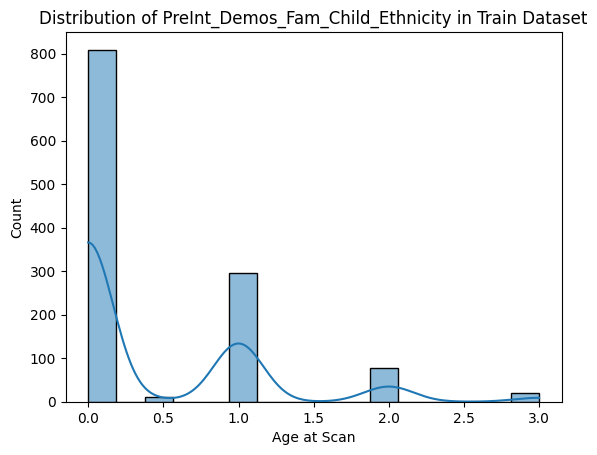

In [ ]:
# Plot the new distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_categorical['PreInt_Demos_Fam_Child_Ethnicity'], kde=True)
plt.title("Distribution of PreInt_Demos_Fam_Child_Ethnicity in Train Dataset")
plt.xlabel("Age at Scan")
plt.show()

In [ ]:
train_categorical.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,int64
Basic_Demos_Study_Site,int64
PreInt_Demos_Fam_Child_Ethnicity,float64
PreInt_Demos_Fam_Child_Race,int64
MRI_Track_Scan_Location,int64
Barratt_Barratt_P1_Edu,int64
Barratt_Barratt_P1_Occ,int64
Barratt_Barratt_P2_Edu,int64
Barratt_Barratt_P2_Occ,int64


only participant ID is an object, and that's arbitrary, so we **don't** need to implement one-hot encoding on it.


next step: finding numerical outliers, and scaling / normalizing data!

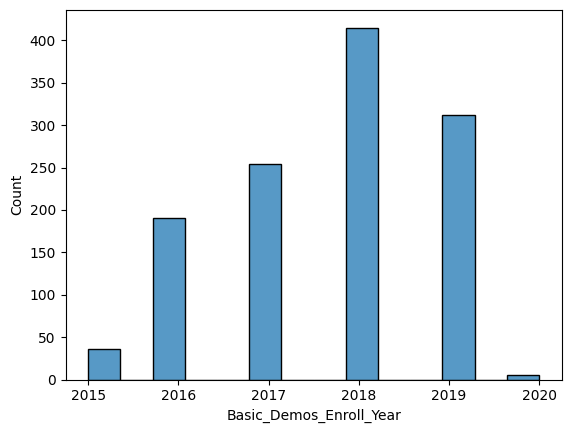

In [ ]:
df = train_categorical # copy, also short
import seaborn as sns
fig = sns.histplot(df, x='Basic_Demos_Enroll_Year')

In [ ]:
test_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [ ]:
test_categorical.nunique()

,0
participant_id,304
Basic_Demos_Enroll_Year,5
Basic_Demos_Study_Site,2
PreInt_Demos_Fam_Child_Ethnicity,4
PreInt_Demos_Fam_Child_Race,9
MRI_Track_Scan_Location,2
Barratt_Barratt_P1_Edu,7
Barratt_Barratt_P1_Occ,9
Barratt_Barratt_P2_Edu,7
Barratt_Barratt_P2_Occ,10


In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


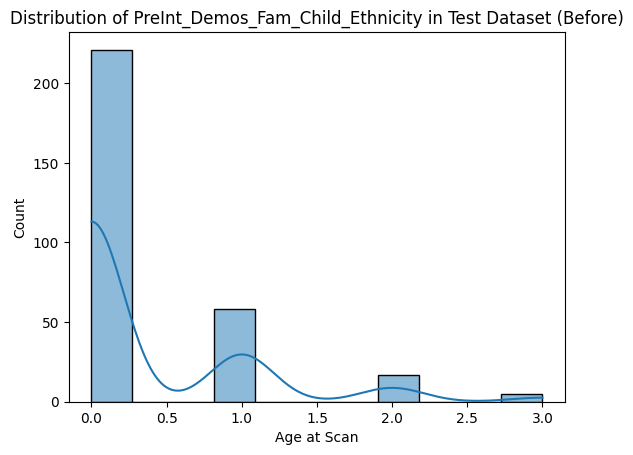

In [ ]:
# same process as before;
# Plot the new distribution
sns.histplot(test_categorical['PreInt_Demos_Fam_Child_Ethnicity'], kde=True)
plt.title("Distribution of PreInt_Demos_Fam_Child_Ethnicity in Test Dataset (Before)")
plt.xlabel("Age at Scan")
plt.show()

In [ ]:
# nan_detected tells us that a column has null values, not how many
nan_detected = nan_count!=0
nan_detected

is_int_or_float = (train_categorical.dtypes == 'int64') | (train_categorical.dtypes == 'float64')
is_int_or_float

# to_impute will tell us if a given feature is both of numeric data AND has missing values
to_impute = nan_detected & is_int_or_float
to_impute

to_impute_selected = train_categorical.columns[to_impute].tolist()
to_impute_selected

[]

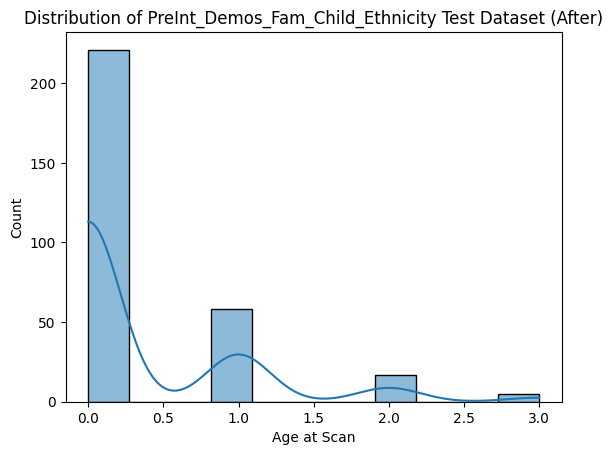

In [ ]:
# Plot the new distribution
sns.histplot(test_categorical['PreInt_Demos_Fam_Child_Ethnicity'], kde=True)
plt.title("Distribution of PreInt_Demos_Fam_Child_Ethnicity Test Dataset (After)")
plt.xlabel("Age at Scan")
plt.show()

In [ ]:
for colname in to_impute_selected:
    train_categorical[colname +'_na'] = train_categorical[colname].isnull()
train_categorical.head()

for colname in to_impute_selected:
    train_categorical[colname].fillna(3, inplace=True)

for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(train_categorical[colname].isnull(), axis = 0)))

In [ ]:
nan_count = np.sum(train_categorical.isnull(), axis = 0)
nan_count

,0
participant_id,0
Basic_Demos_Enroll_Year,0
Basic_Demos_Study_Site,0
PreInt_Demos_Fam_Child_Ethnicity,0
PreInt_Demos_Fam_Child_Race,0
MRI_Track_Scan_Location,0
Barratt_Barratt_P1_Edu,0
Barratt_Barratt_P1_Occ,0
Barratt_Barratt_P2_Edu,0
Barratt_Barratt_P2_Occ,0


### 3. train_connectome and test_connectome dataset

In [ ]:
print(f"Current rows in train_connectome: {len(train_connectome)}")

Current rows in train_connectome: 1213


In [ ]:
train_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [ ]:
# check for missing values
print(train_connectome.isnull().sum())
train_connectome.dropna(inplace=True)

participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [ ]:
# check data types
train_connectome.dtypes

,0
participant_id,object
0throw_1thcolumn,float64
0throw_2thcolumn,float64
0throw_3thcolumn,float64
0throw_4thcolumn,float64
...,...
196throw_198thcolumn,float64
196throw_199thcolumn,float64
197throw_198thcolumn,float64
197throw_199thcolumn,float64


In [ ]:
train_connectome.duplicated().sum()
print(train_connectome.shape)
print("Check")
print(train_connectome.isnull().sum())


(1213, 19901)
Check
participant_id          0
0throw_1thcolumn        0
0throw_2thcolumn        0
0throw_3thcolumn        0
0throw_4thcolumn        0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19901, dtype: int64


In [ ]:
# # applying PCA to retain 95% variance
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95, random_state=42)

# # exclude participant_id because it is not numerical
# x_train_pca = pca.fit_transform(train_connectome.iloc[:, 1:])

# train_pca_df = pd.DataFrame(x_train_pca)
# train_pca_df.insert(0, 'participant_id', train_connectome['participant_id'])

# # saved

# # train_connectome.iloc[:, 1:] = scaler.fit_transform(train_connectome.iloc[:, 1:])

In [ ]:
# # merging labels
# train_pca_df = train_pca_df.merge(train_solutions, on="participant_id", how="inner")
# train_pca_df.to_csv('train_pca.csv', index=False)
# train_pca_df.to_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/train_pca.csv', index=False)


In [ ]:
# print(train_pca_df.describe())


In [ ]:
# Display basic info
test_connectome.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [ ]:
# calculate number of missing values in each column
# show columns with these values
null_vals = test_connectome.isnull().sum();
print(null_vals[null_vals > 0])

test_connectome.dropna(inplace = True)

Series([], dtype: int64)


In [ ]:
# # # normalize features
# # scaler = MinMaxScaler()
# # test_connectome.iloc[:, 1:] = scaler.fit_transform(test_connectome.iloc[:, 1:])

# # exclude participant_id because it is not numerical
# x_test_pca = pca.transform(test_connectome.iloc[:, 1:])

# test_pca_df = pd.DataFrame(x_test_pca)
# test_pca_df.insert(0, 'participant_id', test_connectome['participant_id'])
# test_pca_df.to_csv("/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/test_pca.csv", index=False)


###3. train_solution dataset


checking if there is any invalid data

In [ ]:
# train_solutions.isnull().sum()
train_solutions.isna().sum()

,0
participant_id,0
ADHD_Outcome,0
Sex_F,0


In [ ]:
train_solutions.describe()

,ADHD_Outcome,Sex_F
count,1213.000000,1213.000000
mean,0.685078,0.342951
std,0.464676,0.474891
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
train_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
train_solutions.dtypes

,0
participant_id,object
ADHD_Outcome,int64
Sex_F,int64


In [ ]:
train_categorical.dtypes

,0
participant_id,object
Basic_Demos_Enroll_Year,int64
Basic_Demos_Study_Site,int64
PreInt_Demos_Fam_Child_Ethnicity,float64
PreInt_Demos_Fam_Child_Race,int64
MRI_Track_Scan_Location,int64
Barratt_Barratt_P1_Edu,int64
Barratt_Barratt_P1_Occ,int64
Barratt_Barratt_P2_Edu,int64
Barratt_Barratt_P2_Occ,int64


In [ ]:
train_connectome.dtypes

,0
participant_id,object
0throw_1thcolumn,float64
0throw_2thcolumn,float64
0throw_3thcolumn,float64
0throw_4thcolumn,float64
...,...
196throw_198thcolumn,float64
196throw_199thcolumn,float64
197throw_198thcolumn,float64
197throw_199thcolumn,float64


In [ ]:
train_quantitative.dtypes

,0
participant_id,object
EHQ_EHQ_Total,float64
ColorVision_CV_Score,int64
APQ_P_APQ_P_CP,int64
APQ_P_APQ_P_ID,int64
APQ_P_APQ_P_INV,int64
APQ_P_APQ_P_OPD,int64
APQ_P_APQ_P_PM,int64
APQ_P_APQ_P_PP,int64
SDQ_SDQ_Conduct_Problems,int64


###MERGE TRAINING DATASETS

In [ ]:
print(train_connectome.head)
print(train_categorical.head)
print(train_quantitative.head)
print(train_solutions.head)

<bound method NDFrame.head of      participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1      WHWymJu6zNZi          0.029580          0.179323          0.112933   
2      4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3      obEacy4Of68I          0.016273          0.204702          0.115980   
4      s7WzzDcmDOhF          0.065771          0.098714          0.097604   
...             ...               ...               ...               ...   
1208   kTurROKp5YHQ          0.022932          0.024830         -0.006514   
1209   FCRyMz9O6yCq          0.047078          0.135955          0.144366   
1210   vm2P1hmAY1hl          0.094541          0.145280          0.061964   
1211   OFxvN8lnw21w         -0.001533          0.128562          0.045000   
1212   9gpepMI9sj5q         -0.115224          0.147713          0.083183   

      0throw_4thcolumn  0throw_5thcolumn  0th

In [ ]:
print("Check categorical")
print(train_categorical.shape)

Check categorical
(1213, 10)


In [ ]:
print(train_solutions.shape)

(1213, 3)


In [ ]:
print(train_connectome.shape)

(1213, 19901)


In [ ]:
print("Check quantitative")
print(train_quantitative.shape)

Check quantitative
(1213, 19)


In [ ]:
# train_pca_connectome =  pd.read_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/train_pca.csv')
train_merged = (
    train_connectome
    .merge(train_categorical, on='participant_id', how='left')
    .merge(train_quantitative, on='participant_id', how='left')
    .merge(train_solutions, on='participant_id', how='left')
)

# # Save the merged dataset
# train_merged.to_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TRAIN/TRAIN_MERGED.csv', index=False)

# Display first rows of data
print(train_merged.head())

  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1   WHWymJu6zNZi          0.029580          0.179323          0.112933   
2   4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3   obEacy4Of68I          0.016273          0.204702          0.115980   
4   s7WzzDcmDOhF          0.065771          0.098714          0.097604   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.015141          0.070221          0.063997          0.055382   
1          0.038291          0.104899          0.064250          0.008488   
2          0.046991          0.111085          0.026978          0.151377   
3          0.043103          0.056431          0.057615          0.055773   
4          0.112988          0.071139          0.085607          0.019392   

   0throw_8thcolumn  0throw_9thcolumn  ...  SDQ_SDQ_Emotional_Problems  \
0         -0.03533

###MERGE TEST DATASETS

In [ ]:
test_merged = (
    test_categorical
    .merge(test_quantitative, on='participant_id', how='left')
    .merge(test_connectome, on='participant_id', how='left')
)

# Save the merged dataset
# test_merged.to_csv('/content/drive/MyDrive/Spring AI Studio Team 24 WiDS/TEST/TEST_MERGED.csv', index=False)

# Display first rows of data
print(test_merged.head())

  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   Cfwaf5FX7jWK                     2022                       4   
1   vhGrzmvA3Hjq                     2023                       4   
2   ULliyEXjy4OV                     2022                       4   
3   LZfeAb1xMtql                     2022                       4   
4   EnFOUv0YK1RG                     2022                       4   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               2.0                          0.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \
0                        4                    21.0                    30.0   
1                   

##**3. Model Training**


In [ ]:
# Ensure Consistent Features Between Train & Test**
train_features = set(train_merged.columns) - {'ADHD_Outcome', 'Sex_F'}
test_features = set(test_merged.columns)

missing_in_test = train_features - test_features
extra_in_test = test_features - train_features

print("Features in train but missing in test:", missing_in_test)
print("Features in test but missing in train:", extra_in_test)

Features in train but missing in test: set()
Features in test but missing in train: set()


In [ ]:
# Ensure `test_merged` has the same features as `train_merged` (excluding targets)
test_merged = test_merged[list(train_features)]

In [ ]:
# Define Features & Targets
X = train_merged.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
y_adhd = train_merged['ADHD_Outcome']
y_sex = train_merged['Sex_F']

In [ ]:
X_train, X_val, y_adhd_train, y_adhd_val = train_test_split(X, y_adhd, test_size=0.2, stratify=y_adhd, random_state=42)
X_train, X_val, y_sex_train, y_sex_val = train_test_split(X, y_sex, test_size=0.2, stratify=y_sex, random_state=42)

# Train XGBoost Models
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'random_state': 42}
model_adhd = xgb.XGBClassifier(**params).fit(X_train, y_adhd_train)
model_sex = xgb.XGBClassifier(**params).fit(X_train, y_sex_train)

# TrAin ADHD model
y_adhd_pred = model_adhd.predict(X_val)

# train Sex model
y_sex_pred = model_sex.predict(X_val)

# compute f1 score
f1_adhd = f1_score(y_adhd_val, y_adhd_pred)
f1_sex = f1_score(y_sex_val, y_sex_pred)
final_score = (f1_adhd + f1_sex) / 2
print(f'Final F1 Score: {final_score}')

Final F1 Score: 0.5158821278224264


In [ ]:
# Fix feature mismatch again before predictions
X_test = test_merged[X_train.columns]  # Ensure test set matches training features

In [ ]:
# Generate predictions
submission = pd.DataFrame({'participant_id': test_categorical['participant_id']})
submission['ADHD_Outcome'] = model_adhd.predict(X_test)
submission['Sex_F'] = model_sex.predict(X_test)

In [ ]:
# Save submission files
submission.to_csv("submission.csv", index=False)
print("Submission file saved successfully")

Submission file saved successfully
